In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/DATA_SETS/Cats_and_Dog.zip" -d "/content/drive/My Drive/DATA_SETS/Cats_and_DOgs_Unzipped"

In [0]:
import os
from PIL import Image
import numpy as np

In [0]:
train_dir = '/content/drive/My Drive/DATA_SETS/Cats_and_DOgs_Unzipped/training_set'
validation_dir = '/content/drive/My Drive/DATA_SETS/Cats_and_DOgs_Unzipped/validation_set'
test_dir = '/content/drive/My Drive/DATA_SETS/Cats_and_DOgs_Unzipped/test_set'


In [0]:
train_cats = os.listdir(os.path.join(train_dir,'cats'))
train_dogs = os.listdir(os.path.join(train_dir,'dogs'))

validation_cats = os.listdir(os.path.join(validation_dir, 'cats'))
validation_dogs = os.listdir(os.path.join(validation_dir,'dogs'))

test_cats = os.listdir(os.path.join(test_dir,'cats'))
test_dogs = os.listdir(os.path.join(test_dir,'dogs'))

In [0]:
sample_ = os.listdir('/content/drive/My Drive/DATA_SETS/Cats_and_DOgs_Unzipped/single_prediction')
sample_

['cat_or_dog_1.jpg', 'cat_or_dog_2.jpg']

In [0]:
sample_image_dog = Image.open('/content/drive/My Drive/DATA_SETS/Cats_and_DOgs_Unzipped/single_prediction/cat_or_dog_1.jpg')
sample_image_cat = Image.open('/content/drive/My Drive/DATA_SETS/Cats_and_DOgs_Unzipped/single_prediction/cat_or_dog_2.jpg')

In [0]:
## Getting shapes of images 
print("Shape of Sample cat image", np.array(sample_image_cat).shape)
print("Shape of Sample dog image", np.array(sample_image_dog).shape)

Shape of Sample cat image (1600, 2560, 3)
Shape of Sample dog image (720, 960, 3)


Both images related to RGB colour because both image have 3 chanel size, But height and Width for each image are different, To overcome this situation wee have to apply some preprocessing on these image before feeding a network

For preposseing the images, Keras has a module with image-processing tools loacated at keras.preprocessing.image In particular, there a class **ImageDataGenerator**

## Image Preprocessing

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='binary')

Using TensorFlow backend.


Found 8048 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Building-model

In [0]:
from keras import models
from keras import layers
from keras import optimizers


In [0]:
classifier = models.Sequential()

In [0]:
classifier.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (256,256,3)))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Flatten())
classifier.add(layers.Dense(units=512, activation='relu'))
classifier.add(layers.Dense(units=1, activation='sigmoid'))

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)      

In [0]:

classifier.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  loss='binary_crossentropy',
                   metrics=['accuracy'])

In [0]:
history = classifier.fit_generator(generator=train_generator, 
                                   steps_per_epoch=100,
                                   epochs=20,
                                  validation_data=validation_generator,
                                  validation_steps=50)


Epoch 1/20
100/100 [==============================] - 1135s 11s/step - loss: 0.6921 - accuracy: 0.5525 - val_loss: 0.7230 - val_accuracy: 0.5247
Epoch 2/20
100/100 [==============================] - 845s 8s/step - loss: 0.6410 - accuracy: 0.6200 - val_loss: 0.5454 - val_accuracy: 0.6585
Epoch 3/20
100/100 [==============================] - 684s 7s/step - loss: 0.6047 - accuracy: 0.6630 - val_loss: 0.5017 - val_accuracy: 0.6332
Epoch 4/20
100/100 [==============================] - 562s 6s/step - loss: 0.5903 - accuracy: 0.6744 - val_loss: 0.5255 - val_accuracy: 0.6598
Epoch 5/20
100/100 [==============================] - 558s 6s/step - loss: 0.5605 - accuracy: 0.7178 - val_loss: 0.5384 - val_accuracy: 0.7462
Epoch 6/20
100/100 [==============================] - 565s 6s/step - loss: 0.5442 - accuracy: 0.7234 - val_loss: 0.4899 - val_accuracy: 0.7513
Epoch 7/20
100/100 [==============================] - 558s 6s/step - loss: 0.5364 - accuracy: 0.7362 - val_loss: 0.6170 - val_accuracy: 0.73

In [0]:
classifier.save('/content/drive/My Drive/DATA_SETS/Cats_&_Dogs_small_1.h5')


In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

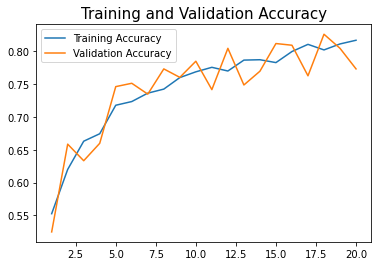

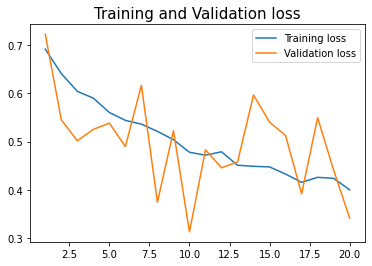

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

epoch = range(1, len(acc)+1)

plt.plot(epoch, acc, label = 'Training Accuracy')
plt.plot(epoch, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize = 15)
plt.legend()
plt.show

plt.figure()
plt.plot(epoch, loss, label = 'Training loss')
plt.plot(epoch, val_loss, label = 'Validation loss')
plt.title('Training and Validation loss', fontsize = 15)
plt.legend()
plt.show

In [0]:
loaded_classifier = models.load_model('/content/drive/My Drive/DATA_SETS/Cats_&_Dogs_small_1.h5')

In [0]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(256, 256),
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
loaded_classifier.evaluate_generator(test_generator)

[0.5389072299003601, 0.7710000276565552]

# **Data** **Augmentation** 

In [0]:
dataAugmentation = ImageDataGenerator(rotation_range=40, 
                                      width_shift_range=0.2,
                                      height_shift_range=0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip= True)

In [0]:
file_path = os.path.join(train_dir, 'cats/'+ train_cats[0])

In [0]:
from keras.preprocessing import image

In [0]:
image_file = image.load_img(file_path, target_size=(256,256))

In [0]:
image_array = np.array(image_file)

In [0]:
image_array = image_array.reshape((1,)+(image_array.shape))

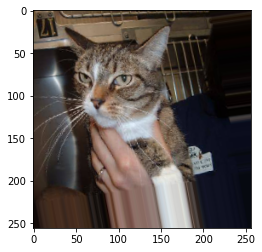

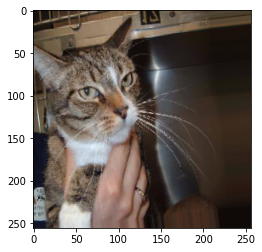

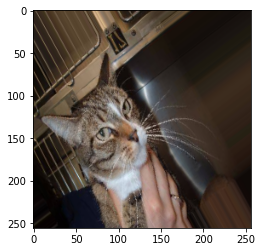

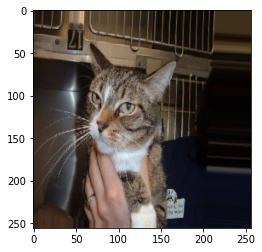

In [0]:
i=0
for batch in dataAugmentation.flow(image_array, batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if(i%4==0):
    break


## Defining new convnets that include Dropout

In [0]:
train_dataAugment = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40, 
                                      width_shift_range=0.2,
                                      height_shift_range=0.2, 
                                      shear_range = 0.2, 
                                      zoom_range = 0.2, 
                                      horizontal_flip= True)

test_dataAugment = ImageDataGenerator(rescale=1./255)

train_data_generator = train_dataAugment.flow_from_directory(train_dir,
                                                             target_size=(150,150), 
                                                             class_mode='binary',
                                                             batch_size=32)
validation_data_generator = test_dataAugment.flow_from_directory(validation_dir,
                                                             target_size=(150,150), 
                                                             class_mode='binary',
                                                             batch_size=32)
test_data_generator = test_dataAugment.flow_from_directory(test_dir,
                                                           target_size=(150,150),
                                                           class_mode='binary',
                                                           batch_size = 1)

Found 8048 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Build Model

In [0]:
classifier = models.Sequential()

classifier.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
classifier.add(layers.MaxPool2D((2,2)))

classifier.add(layers.Flatten())
classifier.add(layers.Dropout(0.5))

classifier.add(layers.Dense(units=512, activation='relu'))
classifier.add(layers.Dense(units=1, activation='sigmoid'))

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
classifier.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  loss='binary_crossentropy',
                   metrics=['accuracy'])

In [0]:
history = classifier.fit_generator(generator=train_data_generator, 
                                   steps_per_epoch=100,
                                   epochs=70,
                                  validation_data=validation_data_generator,
                                validation_steps=30)
classifier.save('/content/drive/My Drive/DATA_SETS/Cats_&_Dogs_small_2_with_dropout.h5')


Epoch 1/70
100/100 [==============================] - 1116s 11s/step - loss: 0.6938 - accuracy: 0.5272 - val_loss: 0.6915 - val_accuracy: 0.5083
Epoch 2/70
100/100 [==============================] - 807s 8s/step - loss: 0.6777 - accuracy: 0.5713 - val_loss: 0.8712 - val_accuracy: 0.5192
Epoch 3/70
100/100 [==============================] - 555s 6s/step - loss: 0.6704 - accuracy: 0.5806 - val_loss: 0.6150 - val_accuracy: 0.6122
Epoch 4/70
100/100 [==============================] - 180s 2s/step - loss: 0.6606 - accuracy: 0.6072 - val_loss: 0.7441 - val_accuracy: 0.5662
Epoch 5/70
100/100 [==============================] - 172s 2s/step - loss: 0.6517 - accuracy: 0.6096 - val_loss: 0.5454 - val_accuracy: 0.6688
Epoch 6/70
100/100 [==============================] - 176s 2s/step - loss: 0.6372 - accuracy: 0.6281 - val_loss: 0.6167 - val_accuracy: 0.6517
Epoch 7/70
100/100 [==============================] - 178s 2s/step - loss: 0.6294 - accuracy: 0.6456 - val_loss: 0.6515 - val_accuracy: 0.57

<function matplotlib.pyplot.show>

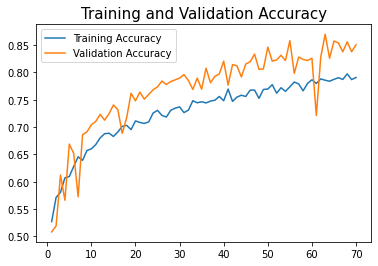

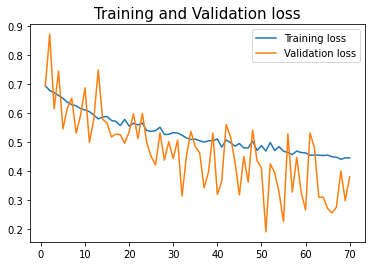

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

epoch = range(1, len(acc)+1)

plt.plot(epoch, acc, label = 'Training Accuracy')
plt.plot(epoch, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize = 15)
plt.legend()
plt.show

plt.figure()
plt.plot(epoch, loss, label = 'Training loss')
plt.plot(epoch, val_loss, label = 'Validation loss')
plt.title('Training and Validation loss', fontsize = 15)
plt.legend()
plt.show